In [2]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 219.4 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/300.2 kB 403.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 481.4 kB/s eta 0:00:01
   ------------------------ ------------- 194.6/300.2 kB 590.8 kB/s eta 0:00:01
   ------------------------------- ------ 245.8/300.2 kB 686.6 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 773.1 kB/s eta 0:00:00


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
books = pd.read_csv("Books.csv")

F:\anaconda3\envs\python_3_7\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
users = pd.read_csv("Users.csv")

In [4]:
ratings = pd.read_csv("Ratings.csv")

In [5]:
df_ratings_books = ratings.merge(books, on='ISBN', how='inner')

In [6]:
df_ratings_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [11]:
df_ratings_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031136 entries, 0 to 1031135
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   User-ID              1031136 non-null  int64 
 1   ISBN                 1031136 non-null  object
 2   Book-Rating          1031136 non-null  int64 
 3   Book-Title           1031136 non-null  object
 4   Book-Author          1031135 non-null  object
 5   Year-Of-Publication  1031136 non-null  object
 6   Publisher            1031134 non-null  object
 7   Image-URL-S          1031136 non-null  object
 8   Image-URL-M          1031136 non-null  object
 9   Image-URL-L          1031132 non-null  object
dtypes: int64(2), object(8)
memory usage: 86.5+ MB


In [5]:
data_filtered = pd.read_csv("books_ratings_clean_notfiltered.csv")

C:\Users\EhtishamRaza\AppData\Local\Temp\ipykernel_26144\3131415570.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  data_filtered = pd.read_csv("Data/books_ratings_clean_notfiltered.csv")


In [11]:
data_filtered.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,276725,034545104X,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...


In [10]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031136 entries, 0 to 1031135
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   User-ID              1031136 non-null  int64  
 1   ISBN                 1031136 non-null  object 
 2   Book-Rating          383842 non-null   float64
 3   Book-Title           1031136 non-null  object 
 4   Book-Author          1031134 non-null  object 
 5   Year-Of-Publication  1031136 non-null  object 
 6   Publisher            1031134 non-null  object 
 7   Image-URL-M          1031136 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.9+ MB


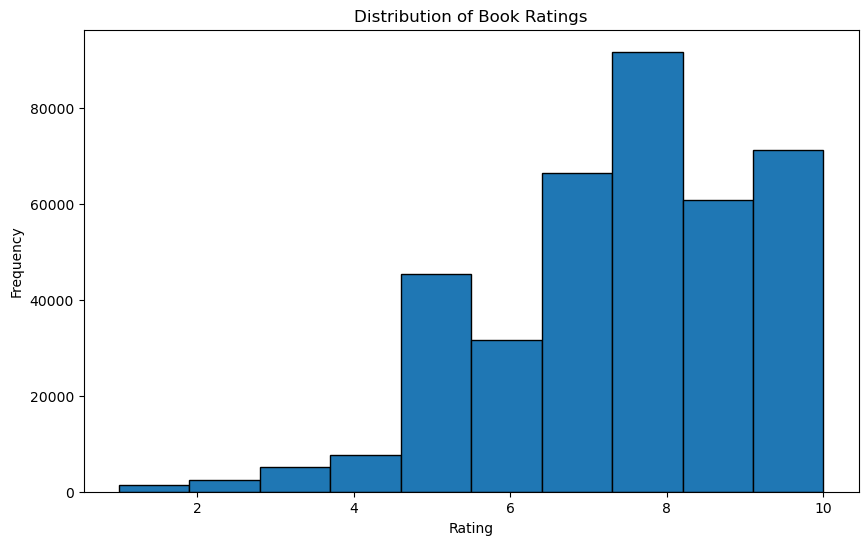

In [6]:
plt.figure(figsize=(10, 6))
data_filtered['Book-Rating'].dropna().hist(bins=10, edgecolor='black')
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

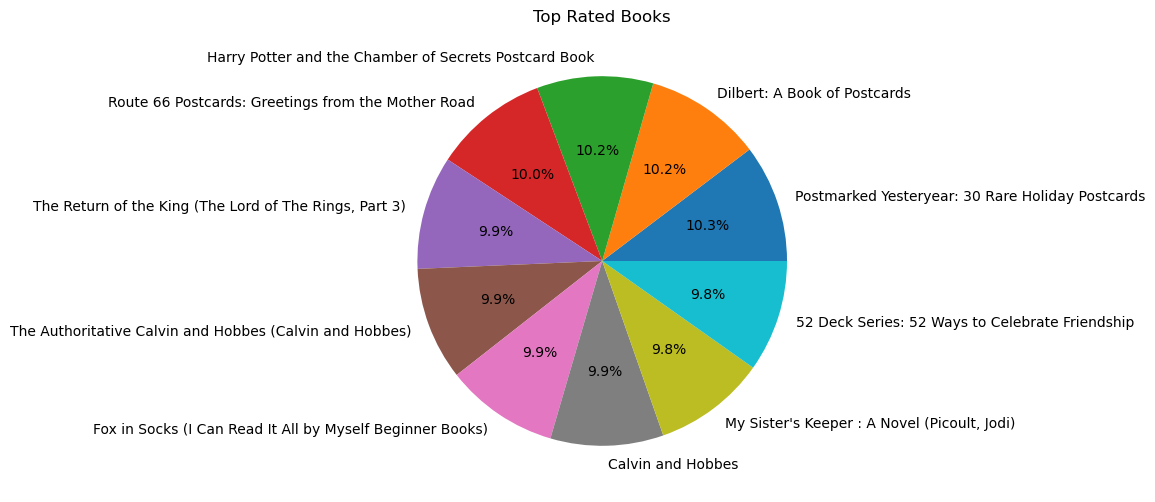

In [7]:
threshold = 10
book_ratings_mean_count = data_filtered.groupby('Book-Title')['Book-Rating'].agg(['mean', 'count'])
top_rated_books = book_ratings_mean_count[book_ratings_mean_count['count'] > threshold].sort_values('mean', ascending=False)

plt.figure(figsize=(10, 6))
top_rated_books['mean'].head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top Rated Books')
plt.ylabel('')
plt.show()


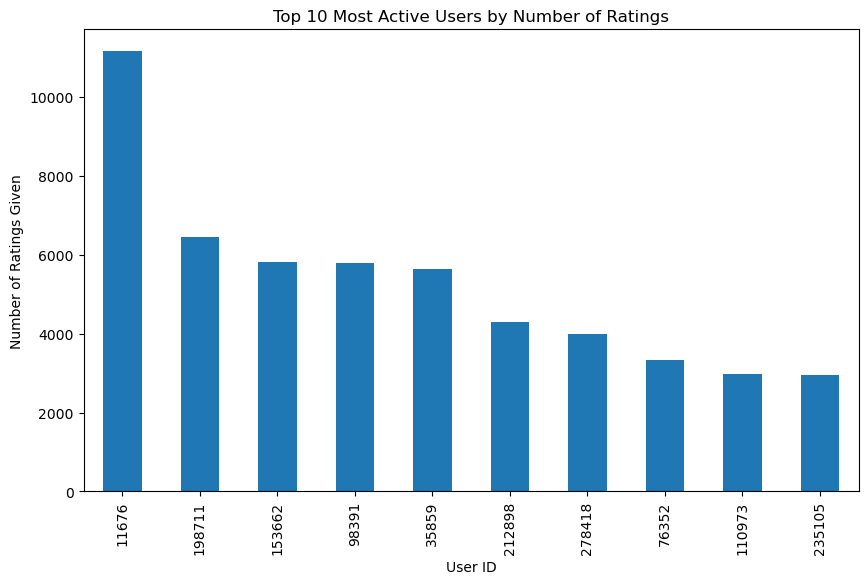

In [8]:
user_activity = data_filtered.groupby('User-ID').size().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
user_activity.head(10).plot(kind='bar')
plt.title('Top 10 Most Active Users by Number of Ratings')
plt.xlabel('User ID')
plt.ylabel('Number of Ratings Given')
plt.show()

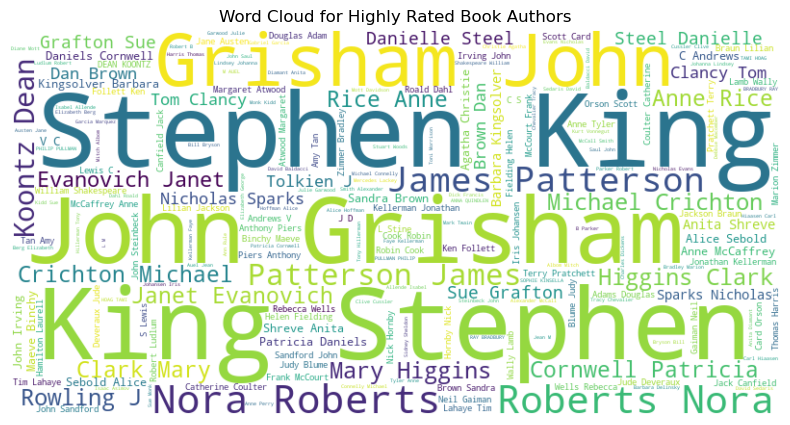

In [15]:
# Filter books with ratings greater than 4 and drop any missing values for authors
highly_rated_books = data_filtered[data_filtered['Book-Rating'] > 4]['Book-Author'].dropna()

# Convert all authors to string as the word cloud library expects strings
text = " ".join(str(author) for author in highly_rated_books)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud for highly rated book authors
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Highly Rated Book Authors')
plt.show()


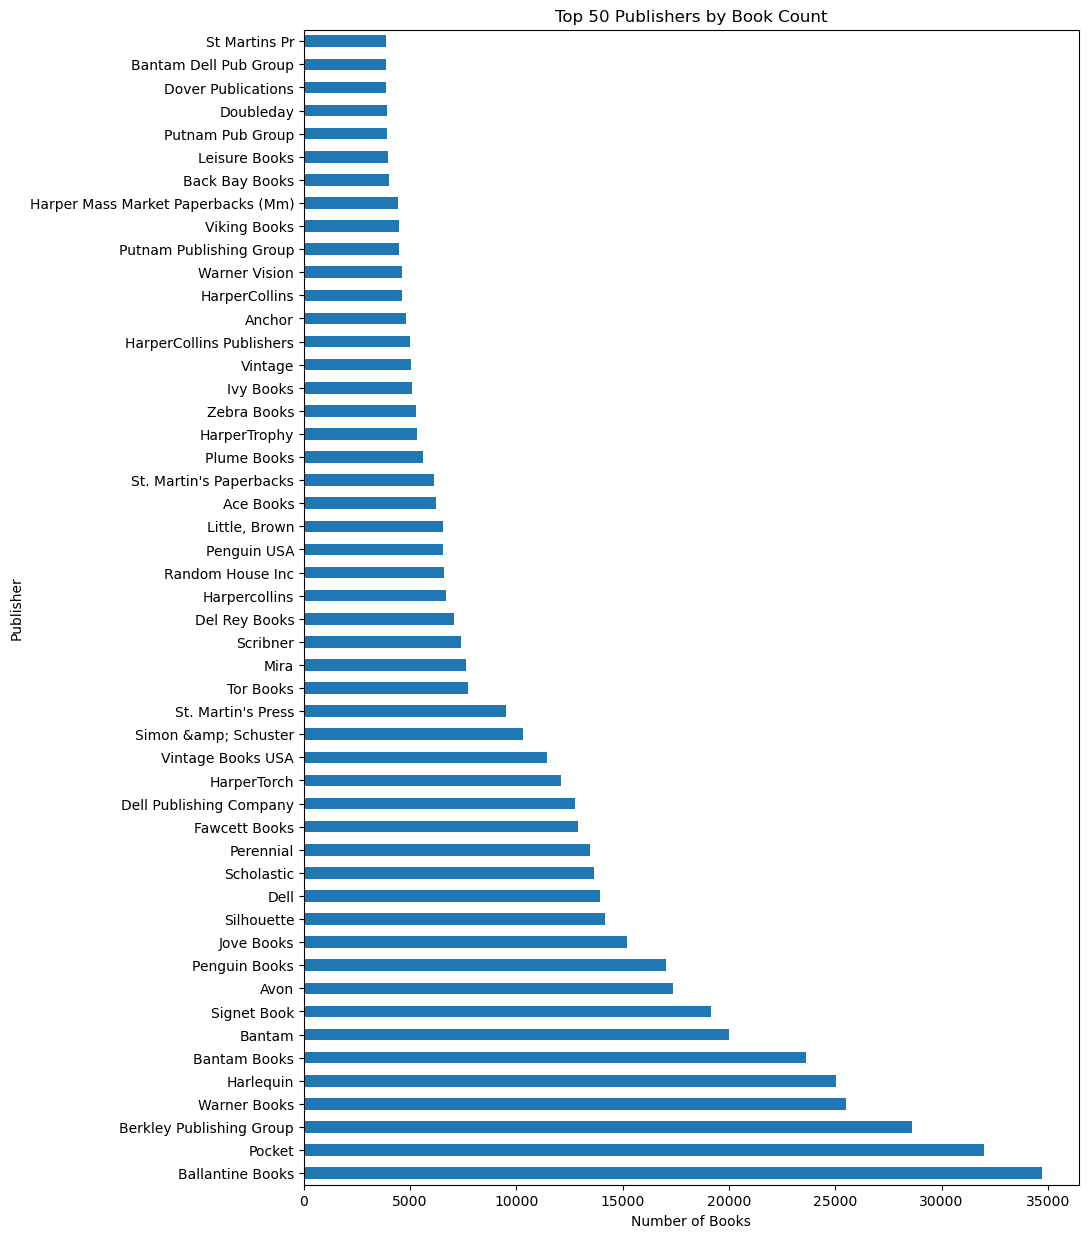

In [9]:
plt.figure(figsize=(10, 15))
data_filtered['Publisher'].value_counts().head(50).plot(kind='barh')
plt.title('Top 50 Publishers by Book Count')
plt.xlabel('Number of Books')
plt.ylabel('Publisher')
plt.show()


F:\anaconda3\envs\python_3_7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


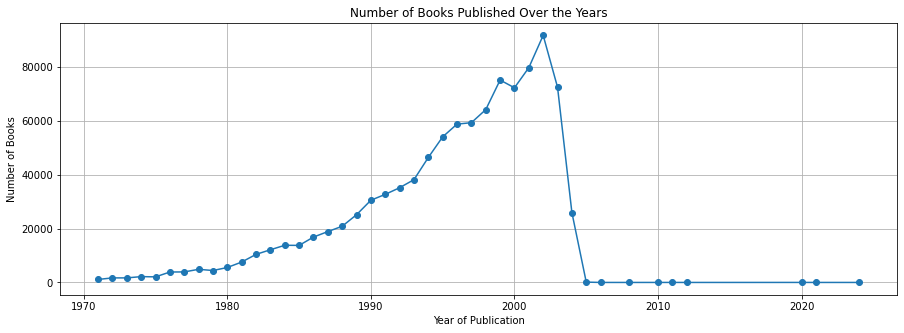

In [19]:
plt.figure(figsize=(15, 5))
filtered_df = data_filtered[(df_ratings_books['Year-Of-Publication'] != '0') & (df_ratings_books['Year-Of-Publication'] != 'Gallimard') & (df_ratings_books['Year-Of-Publication'] != 'DK Publishing Inc')]
filtered_df['Year-Of-Publication'] = pd.to_numeric(filtered_df['Year-Of-Publication'], errors='coerce')
filtered_df = filtered_df[(filtered_df['Year-Of-Publication'] > 1970) & (filtered_df['Year-Of-Publication'] < 2025)]
filtered_df = filtered_df[~filtered_df['Year-Of-Publication'].isna()]
filtered_df['Year-Of-Publication'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Books Published Over the Years')
plt.xlabel('Year of Publication')
plt.ylabel('Number of Books')
plt.grid(True)
plt.show()
